<a href="https://colab.research.google.com/github/inuin09/DeepLearning/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**학습이란,**
훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻함

**손실 함수란,**
신경망이 학습할 수 있도록 해주는 지표임<br>
이 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표임

## 4.1 데이터에서 학습한다!
이번 장에서는 신경망 학습(데이터로부터 매개변수의 값을 정하는 방법)에 대해서 설명하고, 파이썬으로 MNIST 데이터셋의 손글씨 숫자를 학습하는 코드를 구현함.

### 4.1.1 데이터 주도 학습
[그림 4-1]과 같은 자유분방한 손글씨 이미지를 보고 5인지 아닌지를 알아보는 프로그램을 구현하는 것이 목표임.

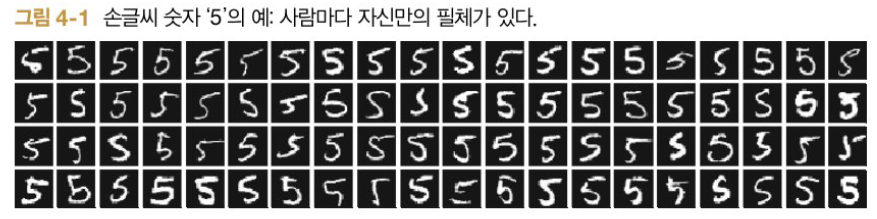

위와 같이 이미지에서 특징을 추출하고 그 특징의 패턴을 머신러닝 기술로 학습하는 방법이 있음.<br>
여기서 말하는 특징은 입력 데이터(입력 이미지)에서 본질적인 데이터(중요한 데이터)를 정확하게 추출할 수 있도록 설계된 변환기를 가리킴.<br>
이미지의 특징은 보통 벡터로 기술하고, 컴퓨터 비전 분야에서는 SIFT, SURF, HOG 등의 특징을 많이 사용함<br>
이런 특징을 사용하여 이미지 데이터를 벡터로 변환하고, 변환된 벡터를 가지고 지도 학습 방식의 대표 분류 기법인 SVM, KNN 등으로 학습할 수 있음<br>

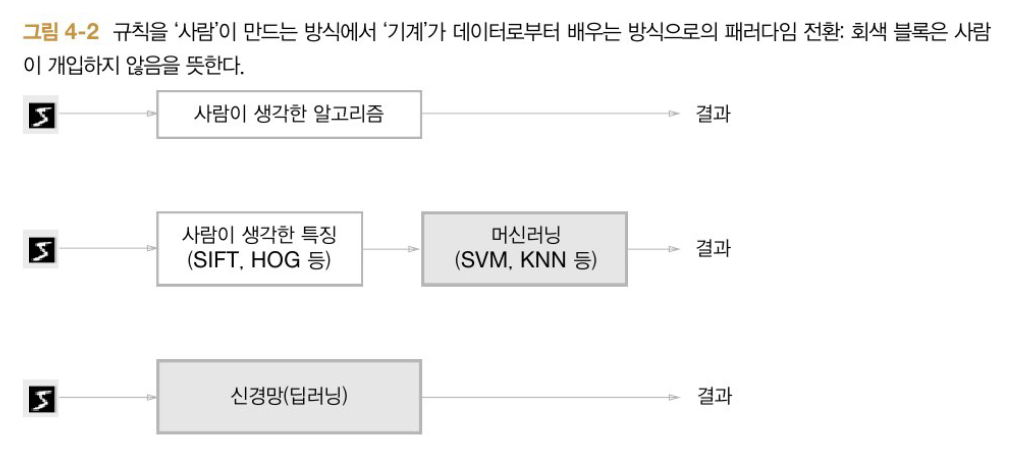
- 기계와 사람이 함께 작용: [그림 4-2]의 중간과 같음
- 신경망(딥러닝) 방식: [그림 4-2]의 아래 (사람이 개입하지 않는 블록 하나로 그려짐)

[그림 4-2]와 같이 신경망은 이미지를 "있는 그대로" 학습함<br>
두 번째 접근 방식(특징과 머신러닝 방식)에서는 특징을 사람이 설계했지만, 신경망은 이미지에 포함된 중요한 특징까지도 '기계'가 스스로 학습할 것임.

- 신경망의 이점: 모든 문제를 같은 맥락에서 풀 수 있음

예를 들어, '5'를 인식하는 문제든, '개'를 인식하는 문제든, 아니면 '사람의 얼굴'을 인식하는 문제든, 세부사항과 관계없이 신경망은 주어진 데이터를 온전히 학습하고 주어진 문제의 패턴을 발견하려 시도함.<br>
즉, 신경망은 모든 문제를 주어진 데이터 그대로를 입력 데이터로 활용해 'end-to-end'로 학습할 수 있음.

### 4.1.2 훈련 데이터와 시험 데이터

- 머신러닝 문제는 데이터를 'training data'와 'test data'로 나눠 학습과 실험을 수행하는 것이 일반적임
- 우선 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾음
- 그런 다음, 시험 데이터를 사용하여 앞서 훈련한 모델의 실력을 평가함

*training data와 test data로 나누는 이유*<br>
: 범용적으로 사용할 수 있는 모델을 원하기 때문<br>
: 이 범용 능력을 제대로 평가하기 위해 training data와 test data를 분리함<br>

- 범용 능력은 아직 보지 못한 데이터 (훈련 데이터에 포함되지 않는 데이터)로도 문제를 올바르게 풀어내는 능력임
- 데이터셋 하나로만 매개변수의 학습과 평가를 수행하면 올바른 평가가 될 수 없음

**과대적합(overfitting)**<br>
한 데이터셋에만 지나치게 최적화된 상태

## 4.2 손실 함수

: 신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현함<br>
: 그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것임<br>
: 신경망은 '하나의 지표'를 기준으로 최적의 매개변수 값을 탐색함<br>
: 신경망 학습에서 사용하는 지표는 **손실 함수**라고 함<br>
: 이 손실 함수는 임의의 함수를 사용할 수도 있지만, 일반적으로는 오차제곱합과 교차 엔트로피 오차를 사용함

### 4.2.1 오차제곱함

가장 많이 쓰이는 손실 함수는 오차제곱합(sum of squares for error, SSE)임<br>
$E=1/2 Σ_k (y_k - t_k)^2$
- $y_k$는 신경망의 출력(신경망이 추정한 값)
- $t_k$는 정답 레이블
- $k$는 데이터의 차원 수를 나타냄

예를 들면, '3.6 손글씨 숫자 인식'예에서 $y_k$와 $t_k$는 다음과 같은 원소 10개짜리 데이터임
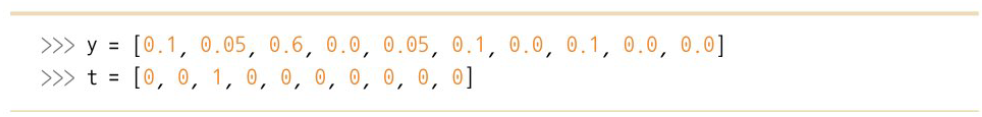

: 이 배열들의 원소는 첫 번째 인덱스부터 순서대로 숫자 0, 1, 2,...일 때의 값임<br>
: 여기에서 신경망의 출력 $y$는 소프트맥스 함수의 출력임<br>
: 소프트맥스 함수의 출력은 확률로 해석할 수 있으므로, 이 예에서는 이미지가 0일 확률은 0.1, 1일 확률은 0.05, 2일 확률은 0.6이라고 해석 가능함<br>
: 정답 레이블인 t는 정답을 가리키는 위치의 원소는 1로, 그 외에는 0으로 표기함<br>
: 여기에서는 숫자 2에 해당하는 원소의 값이 1이므로 정답이 2임을 알 수 있음<br>
: 이처럼 한 원소만 1로 하고 그 외는 0으로 나타내는 표기법을 **원-핫 인코딩**이라 함

**오차제곱합**은 [식 4.1]과 같이 각 원소의 출력(추정 값)과 정답 레이블(참 값)의 차 $(y_k - t_k)$를 제곱한 후, 그 총합을 구함

In [1]:
import numpy as np

def sum_squares_error(y, t):
  return 0.5 * np.sum((y-t)**2)

#여기에서 인수 y와 t는 넘파이 배열임

In [2]:
# 정답은 2
t=[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1: 2일 확률이 가장 높다고 추정함(0.6)
y=[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

np.float64(0.09750000000000003)

In [3]:
# 예2: 7일 확률이 가장 높다고 추정함(0.6)
y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

np.float64(0.5975)

- 위 실험의 결과로 첫 번째 예의 손실 함수 쪽 출력이 작으며 정답 레이블과의 오차도 작다는 사실을 알 수 있음
- 즉, 오차제곱합 기준으로는 첫 번째 추정 결과가 (오차가 더 작으니) 정답에 더 가까울 것으로 판단할 수 있음

### 4.2.2 교차 엔트로피 오차

또 다른 손실 함수로서 **교차 엔트로피 오차(cross entropy error, CEE)**도 자주 이용함<br>
$E = - Σ_k t_k log y_k$
- $log$는 밑이 $e$인 자연로그 $(log_e)$
- $y_k$는 신경망의 출력
- $t_k$는 정답 레이블, 이는 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0임(원-핫 인코딩).

[식 4-2]는 실질적으로 정답일 때의 추정($t_k$가 1일 때의 $y_k$)의 자연로그를 계산하는 식이 됨<br>
예를 들어, 정답 레이블은 2가 정답이라 하고 이때의 신경망 출력이 0.6이라면 교차 엔트로피 오차는 $-log 0.6 = 0.51$이 됨<br>
또한, 같은 조건에서 신경망 출력이 0.1이라면 $-log0.1 = 2.30$이 됨<br>
즉, 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 됨<br>

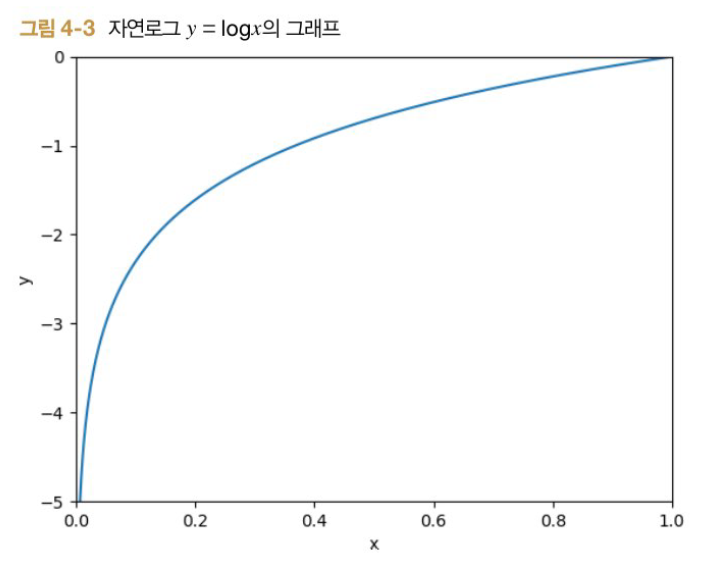

- 위 그림에서 보이듯, $x$가 1일 때 $y$는 0이 되고 $x$가 0에 가까워질수록 $y$의 값은 점점 작아짐
- [식 4.2]도 마찬가지로 정답에 해당하는 출력이 커질수록 0에 다가가다가, 그 출력이 1일 때 0이 됨. 반대로 정답일 때의 출력이 작아질수록 오차는 커짐

In [4]:
def cross_entropy_error(y, t):
  delta=1e-7
  return -np.sum(t*np.log(y+delta))

# y와 t는 넘파이 배열
# 마지막 줄: np.log() 함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 더 이상 계산을 진행할 수 없게 되기 때문에 delta를 더했음
#즉, 아주 작은 값을 더해서 절대 0이 되지 않도록, 마이너스 무한대가 발생하지 않도록 한 것임

In [5]:
t=[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y=[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

np.float64(0.510825457099338)

In [6]:
y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

np.float64(2.302584092994546)

- 첫 번째 예는 정답일 때의 출력이 0.6인 경우로, 이때의 교차 엔트로피 오차는 약 0.51임
- 그 다음은 정답일 때의 출력이 (더 낮은) 0.1인 경우로, 이때의 교차 엔트로피 오차는 무려 2.3임.
- 즉, 결과(오차 값)가 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단하였고, 이는 앞서 오차제곱합의 판단과 일치함

### 4.2.3 미니배치 학습

머신러닝 문제는 training data를 사용해 학습함
- training data에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾아냄
- 이렇게 하려면 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야 함
- 즉, 훈련 데이터가 100개 있으면 그로부터 계산한 100개의 손실 함수 값들의 합을 지표로 삼는 것임

training data 모두에 대한 손실 함수의 합을 구하는 방법을 살펴봄<br>
예를 들어, 교차 엔트로피 오차는[식 4.3]처럼 됨<br>

$E=-1/N Σ_n Σ_k t_{nk} log y_{nk}$

- 데이터가 $N$개라면 $t_{nk}$는 $n$번째 데이터의 $k$번째 값을 의미함
- $y_{nk}$는 신경망의 출력
- $t_{nk}$는 정답 레이블

*식 4.3은 데이터 하나에 대한 손실 함수인 [식 4.2]를 단순히 $N$개의 데이터로 확장했을 뿐임*

